# LCPB 21-22 Exercise 4, EGBoost
## Group 19

Alessandro Zanoli, Emerson Rodrigues Vero filho, Luca Giorgetti, Raffaele Gaudio

In [4]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from tsfresh import extract_features
from xgboost import XGBClassifier, plot_tree
# random seed for reproducibility
plt.style.use('seaborn')
%run plot.py

## Loading Data

In [8]:
#use the dataset generated in the last exercise (we have to use the same data as in exercise 3 because we will compare the performances of CNN and Xgboost)

str0 = 'ts_L200_Z12_A500_DX50_bias5_N10000.npy'
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

x=np.load(fnamex)
y=np.load(fnamey)

N,L = len(x), len(x[0])
N_train= int(N*0.8)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]



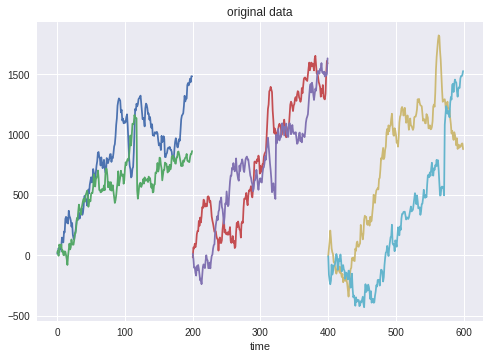

In [9]:

Show_data(x,L,"original data")

In [10]:
def fit(xgbr=XGBRegressor(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    xgbr.fit(x_train,y_train)
    y_hat = xgbr.predict(x_test)
    print("mean squared error: {:.2f}".format(mean_squared_error(y_hat, y_test)))
    if show: 
        dx = 0.02
        x_seq=np.arange(-S,S+dx,dx)
        nx = len(x_seq)
        x_plot=np.zeros((nx*nx,2))
        q=0
        for i in range(nx):
            for j in range(nx):
                x_plot[q,:] = [x_seq[i],x_seq[j]]
                q+=1
        y_plot= xgbr.predict(x_plot)

        plt.figure(figsize=(9.5,8))
        plt.title(str(xgbr))
        scat(x_plot,y_plot,cmap="winter",s=0.2)
        plt.colorbar()
        scat(x_train,y_train,s=7)
        plt.show()
    if show:      
        dump_list = xgbr.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(xgbr, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-fit.png", dpi=300, pad_inches=0.02)   
        plt.show()
        #plt.savefig("net"+str(t)+".png",dpi=300)
        plt.show()

In [11]:
fit(XGBRegressor(seed=1,reg_lambda=50., n_estimators=100,max_depth=3),show=True)

ValueError: Please reshape the input data into 2-dimensional matrix.